In [7]:
from collections import defaultdict
from pathlib import Path

def count_classes(dataset_path):
    splits_stats = {}
    
    for split in ['train', 'valid', 'test']:
        labels_path = Path(dataset_path) / split / 'labels'
        if not labels_path.exists():
            continue
            
        class_counts = defaultdict(int)
        for txt_file in labels_path.glob('*.txt'):
            try:
                with open(txt_file, 'r') as f:
                    for line in f:
                        class_id = int(line.split()[0])
                        class_counts[class_id] += 1
            except Exception as e:
                print(f"Error reading {txt_file}: {e}")
        
        splits_stats[split] = dict(class_counts)

    print("\nClass distribution by splits:")
    print("=" * 40)
    
    # Подсчитаем общее количество для каждого класса
    total_by_class = defaultdict(int)
    for stats in splits_stats.values():
        for class_id, count in stats.items():
            total_by_class[class_id] += count

    for split, counts in splits_stats.items():
        print(f"\n{split.upper()}:")
        for class_id in sorted(total_by_class.keys()):  # Сортируем по классам
            count = counts.get(class_id, 0)
            print(f"Class {class_id}: {count}")
    
    print("\nTOTAL across all splits:")
    for class_id, count in sorted(total_by_class.items()):
        print(f"Class {class_id}: {count}")

if __name__ == "__main__":
    dataset_path = "data/mias_annotated"
    count_classes(dataset_path)


Class distribution by splits:

TRAIN:
Class 0: 291
Class 1: 224
Class 2: 318
Class 3: 336
Class 4: 184
Class 5: 289

VALID:
Class 0: 6
Class 1: 4
Class 2: 8
Class 3: 6
Class 4: 3
Class 5: 9

TEST:
Class 0: 11
Class 1: 11
Class 2: 9
Class 3: 9
Class 4: 11
Class 5: 8

TOTAL across all splits:
Class 0: 308
Class 1: 239
Class 2: 335
Class 3: 351
Class 4: 198
Class 5: 306


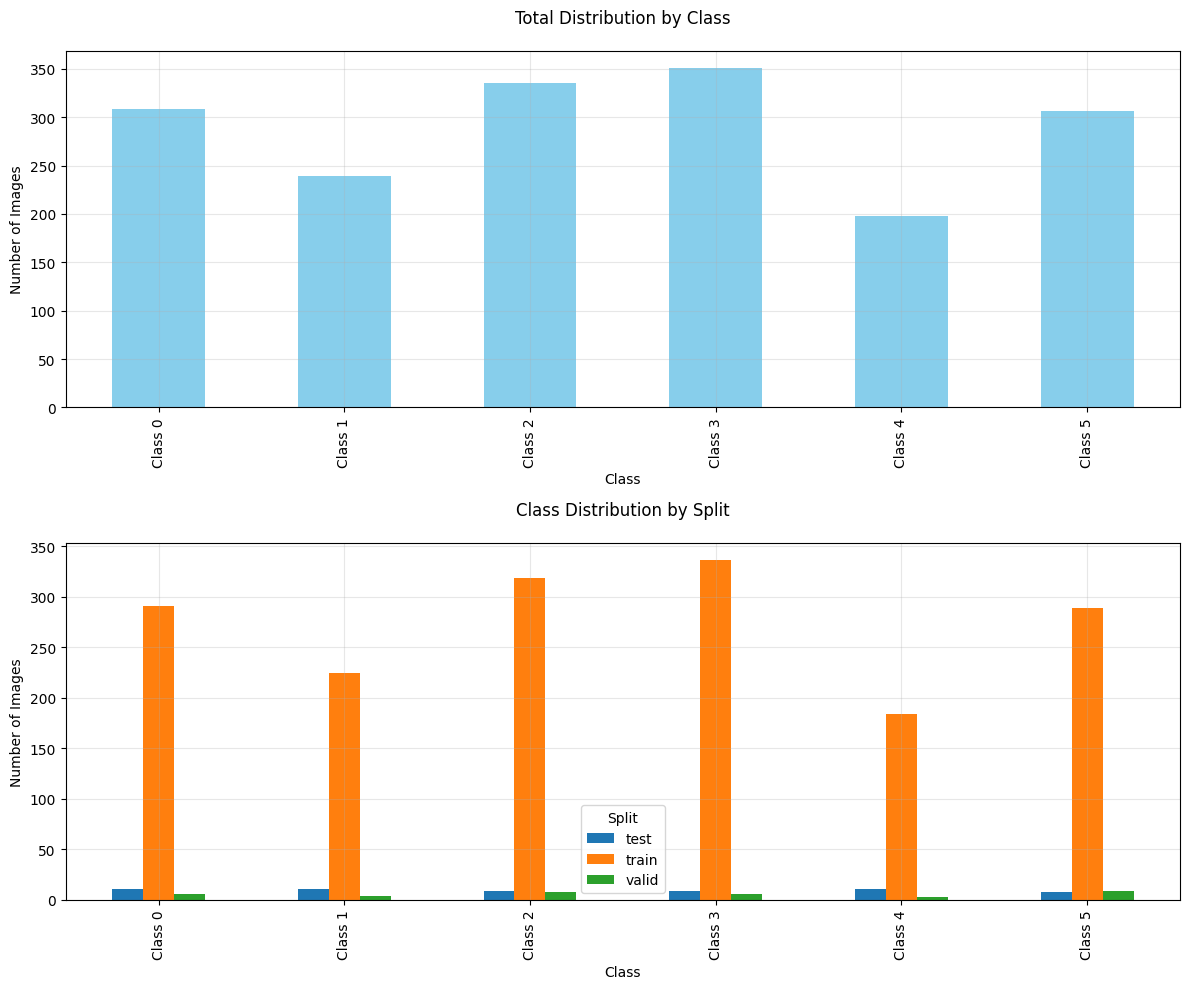

In [11]:
from collections import defaultdict
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

def visualize_classes(dataset_path):
    data = []
    
    for split in ['train', 'valid', 'test']:
        labels_path = Path(dataset_path) / split / 'labels'
        class_counts = defaultdict(int)
        
        for txt_file in labels_path.glob('*.txt'):
            with open(txt_file, 'r') as f:
                for line in f:
                    class_id = int(line.split()[0])
                    class_counts[class_id] += 1
                    
        for class_id, count in class_counts.items():
            data.append({
                'Split': split,
                'Class': f'Class {class_id}',
                'Count': count
            })
    
    df = pd.DataFrame(data)
    
    # Создаем графики
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Общее распределение
    total_by_class = df.groupby('Class')['Count'].sum()
    total_by_class.plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_title('Total Distribution by Class', pad=20)
    ax1.set_ylabel('Number of Images')
    ax1.grid(True, alpha=0.3)
    
    # Распределение по сплитам
    df_pivot = df.pivot(columns='Split', index='Class', values='Count')
    df_pivot.plot(kind='bar', ax=ax2)
    ax2.set_title('Class Distribution by Split', pad=20)
    ax2.set_ylabel('Number of Images')
    ax2.grid(True, alpha=0.3)
    ax2.legend(title='Split')
    
    plt.tight_layout()
    plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    dataset_path = "data/mias_annotated"
    visualize_classes(dataset_path)

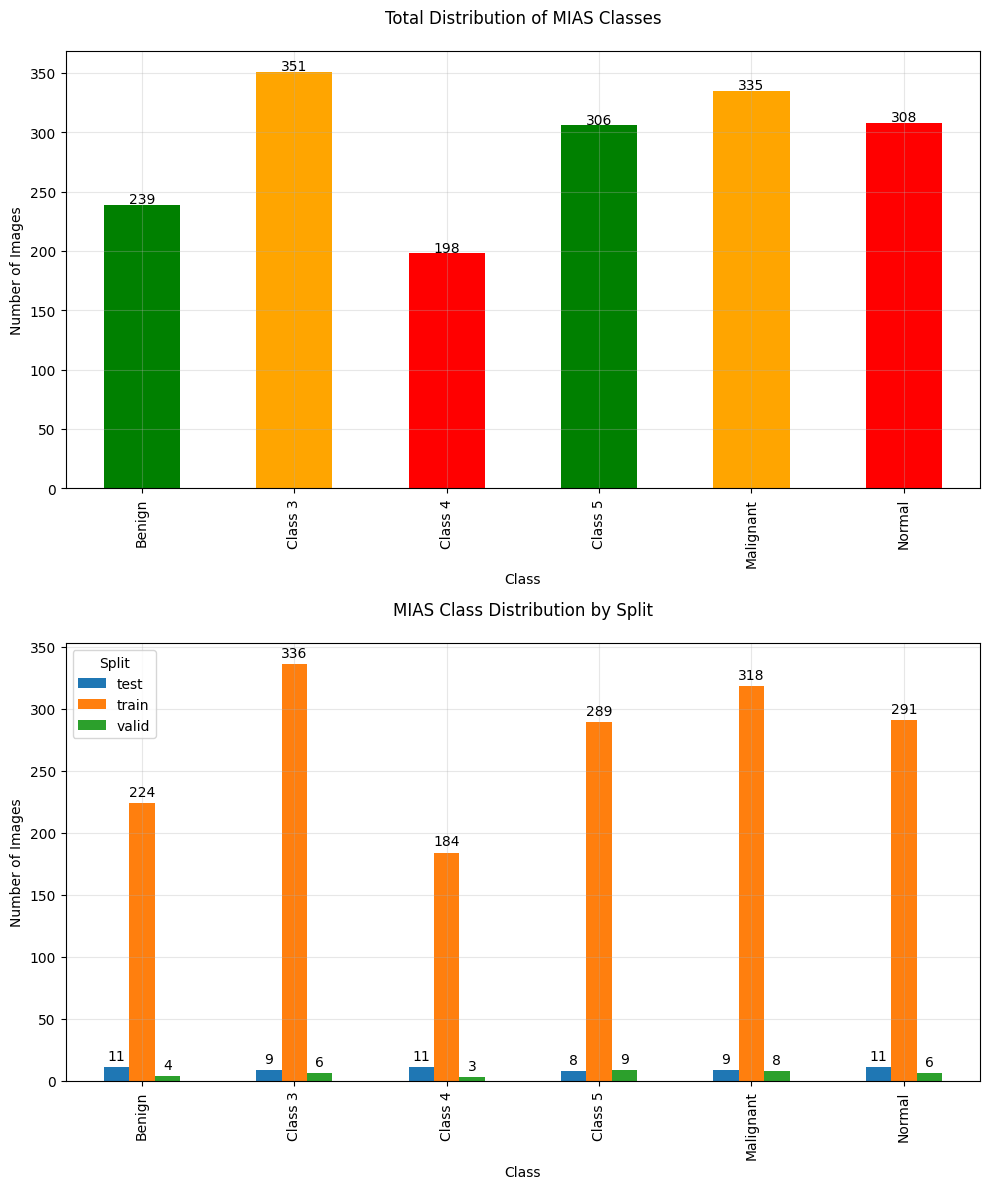


Class distribution percentages:
Benign: 13.8%
Class 3: 20.2%
Class 4: 11.4%
Class 5: 17.6%
Malignant: 19.3%
Normal: 17.7%


In [12]:
from collections import defaultdict
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

def visualize_mias_classes(dataset_path):
    data = []
    class_mapping = {
        0: 'Normal',
        1: 'Benign',
        2: 'Malignant'
    }
    
    for split in ['train', 'valid', 'test']:
        labels_path = Path(dataset_path) / split / 'labels'
        class_counts = defaultdict(int)
        
        for txt_file in labels_path.glob('*.txt'):
            with open(txt_file, 'r') as f:
                for line in f:
                    class_id = int(line.split()[0])
                    class_name = class_mapping.get(class_id, f'Class {class_id}')
                    class_counts[class_name] += 1
                    
        for class_name, count in class_counts.items():
            data.append({
                'Split': split,
                'Class': class_name,
                'Count': count
            })
    
    df = pd.DataFrame(data)
    
    # Создаем графики
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    
    # Общее распределение
    total_by_class = df.groupby('Class')['Count'].sum()
    bars1 = total_by_class.plot(kind='bar', ax=ax1, color=['green', 'orange', 'red'])
    ax1.set_title('Total Distribution of MIAS Classes', fontsize=12, pad=20)
    ax1.set_ylabel('Number of Images')
    ax1.grid(True, alpha=0.3)
    
    # Добавляем значения над столбцами
    for i, v in enumerate(total_by_class):
        ax1.text(i, v + 1, str(v), ha='center')
    
    # Распределение по сплитам
    df_pivot = df.pivot(columns='Split', index='Class', values='Count')
    bars2 = df_pivot.plot(kind='bar', ax=ax2)
    ax2.set_title('MIAS Class Distribution by Split', fontsize=12, pad=20)
    ax2.set_ylabel('Number of Images')
    ax2.grid(True, alpha=0.3)
    ax2.legend(title='Split')
    
    # Добавляем значения над столбцами
    for container in ax2.containers:
        ax2.bar_label(container, padding=3)
    
    plt.tight_layout()
    plt.savefig('mias_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Выводим процентное соотношение
    total_images = total_by_class.sum()
    print("\nClass distribution percentages:")
    for class_name, count in total_by_class.items():
        percentage = (count / total_images) * 100
        print(f"{class_name}: {percentage:.1f}%")

if __name__ == "__main__":
    dataset_path = "data/mias_annotated"
    visualize_mias_classes(dataset_path)